In [1]:
from AnastrisTNG import TNGsimulation,TNGtools,Anatools
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])

In [2]:
import gal1d

### 载入需要拟合的数据

In [3]:
BATHPATH='/home/dumin/IllustrisTNG/TNG50-1/output/'
snap99=TNGsimulation.Snapshot(BasePath=BATHPATH,Snap=99)

In [4]:
sub= snap99.load_particle(12)
sub.physical_units()
sub.face_on(alignwith='star',rmax=8)

In [7]:
bins = sub.r(np.linspace(0.01,0.99,100,),calfor='dm',calpa='mass')
pr = TNGtools.Profile(sub.dm,ndim=3,bins=bins)
rdm = pr['rbins'][pr['density']>0]
rhodm = pr['density'][pr['density']>0]

In [8]:
sub.R_vir(200)

SimArray(131.12839301, 'kpc')

### 拟合profile，有些profile参数过多，需要将BOUND范围设置小一些

In [11]:
gal1d.DoublePowerLawProfile.BOUND['alpha']=[0,5]
gal1d.DoublePowerLawProfile.BOUND['beta']=[0,10]
gal1d.DoublePowerLawProfile.BOUND['gamma']=[0,5]
dou,jic = gal1d.DoublePowerLawProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in dou.keys():
    print(i,dou[i])
dou.formular()

density_scale_radius 326511.08367511455
scale_radius 64.86060372597566
alpha 1.5402446398577614
beta 8.217590060949036
gamma 1.4720791780793774


In [12]:
nfw,jic = gal1d.NFWProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in nfw.keys():
    print(i,nfw[i])
nfw.formular()

scale_radius 5.607186007332322
density_scale_radius 57163184.004513636


In [13]:
gnfw,jic = gal1d.GNFWProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in gnfw.keys():
    print(i,gnfw[i])
gnfw.formular()

density_scale_radius 98609355.66739245
scale_radius 4.676146416559958
gamma 0.6793460964475361


In [14]:

ein,jic = gal1d.EinastoProfile.fit(rdm,rhodm,use_analytical_jac=False)
for i in ein.keys():
    print(i,ein[i])
ein.formular()

density_scale_radius 580583.3288160414
scale_radius 23.65475177582548
Einasto_index 2.5365182292339252


### 半径以内的所有质量

In [15]:
np.log10(gnfw.enclosed_mass(200))

11.521204875382237

In [16]:
np.log10(nfw.enclosed_mass(200))

11.522383111080957

In [17]:
np.log10(sub.dm['mass'].sum())

SimArray(11.30674471, 'Msol')

In [18]:
np.log10(ein.enclosed_mass(200))

11.355443721766802

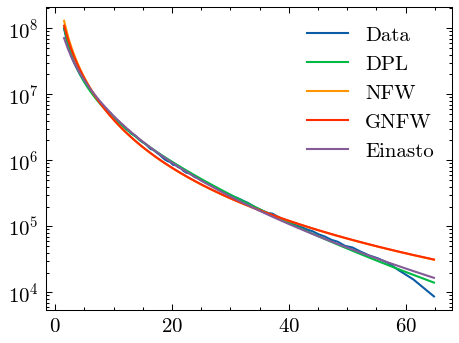

In [19]:
plt.figure(dpi=150)
plt.plot(rdm,rhodm,label='Data')
plt.plot(rdm,dou(rdm),label='DPL')
plt.plot(rdm,nfw(rdm),label='NFW')
plt.plot(rdm,gnfw(rdm),label='GNFW')
plt.plot(rdm,ein(rdm),label='Einasto')
plt.legend()
plt.yscale('log')

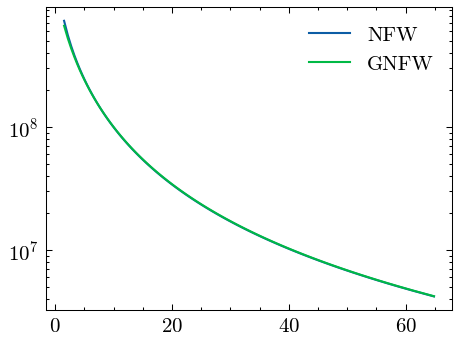

In [20]:
plt.figure(dpi=150)
plt.plot(rdm,nfw.density_2d(rdm),label='NFW')
plt.plot(rdm,gnfw.density_2d(rdm.view(np.ndarray)),label='GNFW')
plt.legend()
plt.yscale('log')
#plt.xscale('log')

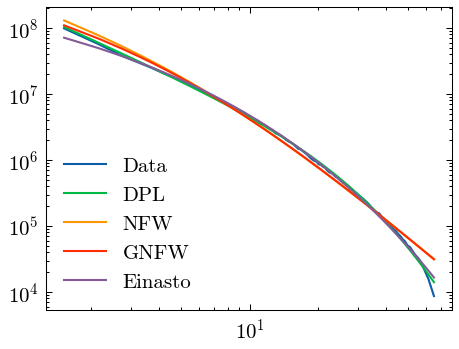

In [21]:
plt.figure(dpi=150)
plt.plot(rdm,rhodm,label='Data')
plt.plot(rdm,dou(rdm),label='DPL')
plt.plot(rdm,nfw(rdm),label='NFW')
plt.plot(rdm,gnfw(rdm),label='GNFW')
plt.plot(rdm,ein(rdm),label='Einasto')
plt.legend()
plt.yscale('log')
plt.xscale('log')

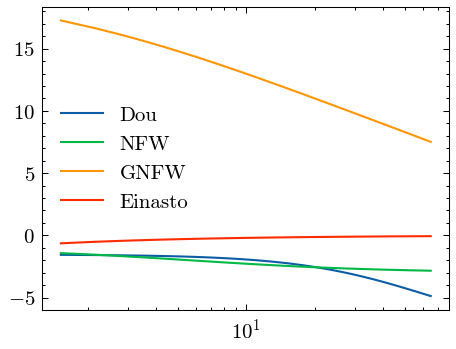

In [22]:
plt.figure(dpi=150)
plt.plot(rdm,dou.logarithmic_slope(rdm),label='Dou')
plt.plot(rdm,nfw.logarithmic_slope(rdm),label='NFW')
plt.plot(rdm,gnfw.logarithmic_slope(rdm),label='GNFW')
plt.plot(rdm,ein.logarithmic_slope(rdm),label='Einasto')
plt.legend()
#plt.yscale('log')
plt.xscale('log')

In [23]:
bins = sub.R(np.linspace(0.01,0.99,100),calfor='star',calpa='mass')
pR = TNGtools.Profile(sub.s,ndim=2,bins=bins)
Rstar = pR['rbins'][pR['density']>0]
denstar = pR['density'][pR['density']>0]

### 拟合以及表达式

In [24]:
gal1d.SersicProfile.BOUND['n']=[0.2,20]

ser,jic =gal1d.SersicProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in ser.keys():
    print(i,ser[i])
ser.formular()

n 2.5217098633834407
r_e 6.703822643479865
I_e 47725430.21450559


In [25]:
#gal1d.CoreSersicProfile.BOUND['n']=[0.2,20]

cor,jic =gal1d.CoreSersicProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in cor.keys():
    print(i,cor[i])
cor.formular()

I_b 2481861428.4563346
r_b 7.752301325475376
r_e 19.267578550060964
n 3.1563482824317597
alpha 1.5257420596553424
gamma 1.4749369425038101


In [26]:
exp,jic =gal1d.ExponentialProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in exp.keys():
    print(i,exp[i])
exp.formular()

h 4.4238449309405565
I_0 340767669.3592946


### 所有质量

In [27]:
np.log10(ser.total_mass())

10.591041331449995

In [28]:
np.log10(exp.total_mass())

10.622238042799106

In [29]:
np.log10(sub.s['mass'].sum())

SimArray(10.56524473, 'Msol')

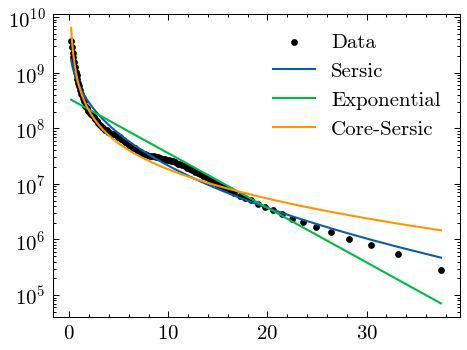

In [31]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,ser(Rstar),label='Sersic')
plt.plot(Rstar,exp(Rstar),label='Exponential')
plt.plot(Rstar,cor(Rstar),label='Core-Sersic')
plt.legend()
plt.yscale('log')

## 拟合多成分的曲线，用MultiProfiles，add_profile

In [32]:
Ser_Exp = gal1d.MultiProfiles()
gal1d.SersicProfile.BOUND['n'] = [0,8]
Ser_Exp.add_profile(gal1d.SersicProfile)
Ser_Exp.add_profile(gal1d.ExponentialProfile)
Ser_Exp.fit(Rstar,denstar,use_analytical_jac=True)

In [33]:
Ser_Exp

<||SersicProfile|ExponentialProfile||>

(100000.0, 10000000000.0)

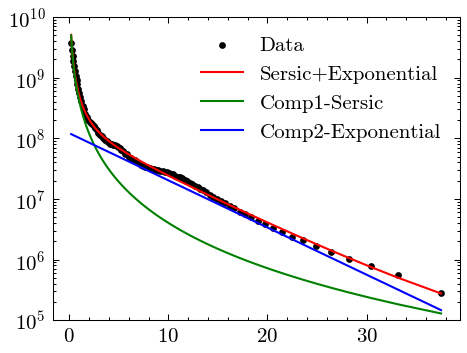

In [69]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Ser_Exp(Rstar),label='Sersic+Exponential',c='r')
plt.plot(Rstar,Ser_Exp['c1']*Ser_Exp['p1'](Rstar),label='Comp1-Sersic',c='g')
plt.plot(Rstar,Ser_Exp['c2']*Ser_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

### 半径以内的质量，以及各个成分的质量占比

In [36]:
np.log10(sub.s['mass'].sum())

SimArray(10.56524473, 'Msol')

In [37]:
np.log10(Ser_Exp.enclosed_mass(20))

10.525618280033527

In [38]:
np.array(Ser_Exp.components_enclosed_mass(20))/Ser_Exp.enclosed_mass(20)

array([0.38127623, 0.61872377])

In [39]:
Dou_Exp = gal1d.MultiProfiles()
Dou_Exp.add_profile(gal1d.ExponentialProfile)
Dou_Exp.add_profile(gal1d.ExponentialProfile)
Dou_Exp.fit(Rstar,denstar,use_analytical_jac=True)

(100000.0, 10000000000.0)

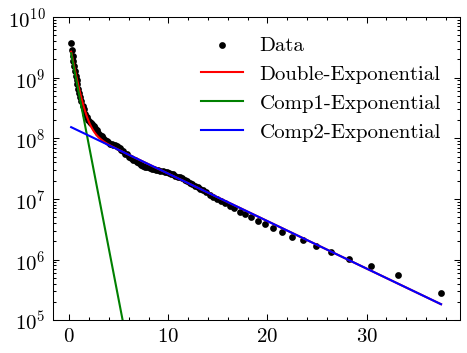

In [68]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Dou_Exp(Rstar),label='Double-Exponential',c='r')
plt.plot(Rstar,Dou_Exp['c1']*Dou_Exp['p1'](Rstar),label='Comp1-Exponential',c='g')
plt.plot(Rstar,Dou_Exp['c2']*Dou_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [46]:
Dou_Ser = gal1d.MultiProfiles()
Dou_Ser.add_profile(gal1d.SersicProfile)
Dou_Ser.add_profile(gal1d.SersicProfile)
Dou_Ser.fit(Rstar,denstar,use_analytical_jac=True)

(100000.0, 10000000000.0)

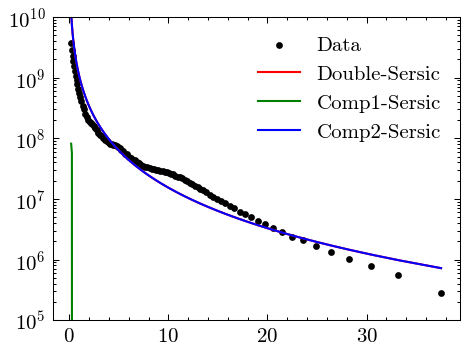

In [67]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Dou_Ser(Rstar),label='Double-Sersic',c='r')
plt.plot(Rstar,Dou_Ser.components_profile(Rstar)[0],label='Comp1-Sersic',c='g')
plt.plot(Rstar,Dou_Ser.components_profile(Rstar)[1],label='Comp2-Sersic',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [59]:
print(Dou_Ser['p2'])
for i in Dou_Ser['p2'].keys():
    print(i, Dou_Ser['p2'][i])

<SersicProfile['n', 'r_e', 'I_e']>
n 7.999999999358103
r_e 5.172525967009542
I_e 58964181.7593591


In [50]:
CorSer_Exp = gal1d.MultiProfiles()
CorSer_Exp.add_profile(gal1d.CoreSersicProfile)
CorSer_Exp.add_profile(gal1d.ExponentialProfile)
CorSer_Exp.fit(Rstar,denstar,use_analytical_jac=True)

In [51]:
CorSer_Exp

<||CoreSersicProfile|ExponentialProfile||>

(100000.0, 10000000000.0)

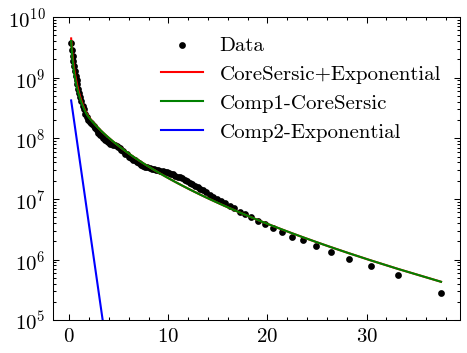

In [66]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,CorSer_Exp(Rstar.view(np.ndarray)),label='CoreSersic+Exponential',c='r')
plt.plot(Rstar,CorSer_Exp['c1']*CorSer_Exp['p1'](Rstar),label='Comp1-CoreSersic',c='g')
plt.plot(Rstar,CorSer_Exp['c2']*CorSer_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [56]:
CorSer_Exp['p1']

<CoreSersicProfile['I_b', 'r_b', 'r_e', 'n', 'alpha', 'gamma']>

In [57]:
print(CorSer_Exp['p1'])
for i in CorSer_Exp['p1'].keys():
    print(i, CorSer_Exp['p1'][i])

<CoreSersicProfile['I_b', 'r_b', 'r_e', 'n', 'alpha', 'gamma']>
I_b 1339436846.418265
r_b 1.7972007728632624
r_e 7.743303260592182
n 1.967557369009247
alpha 19.348731733066654
gamma 1.2680686913203967


In [58]:
print(CorSer_Exp['p2'])
for i in CorSer_Exp['p2'].keys():
    print(i, CorSer_Exp['p2'][i])

<ExponentialProfile['h', 'I_0']>
h 0.3812580103923744
I_0 702997789.8080705
